<a href="https://colab.research.google.com/github/BlackCurrantDS/DeepLearning/blob/main/IDL_Assignment11_based_on9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References- 

https://medium.com/@ml.at.berkeley/tricking-neural-networks-create-your-own-adversarial-examples-a61eb7620fd8

https://adversarial-ml-tutorial.org/adversarial_examples/

https://harvard-iacs.github.io/2019-CS109B/lecture/lab21/AdversarialNN/

https://adversarial-ml-tutorial.org/adversarial_examples/

https://medium.com/analytics-vidhya/implementing-adversarial-attacks-and-defenses-in-keras-tensorflow-2-0-cab6120c5715

Targeted - adding carefully nosie despite looking same to human
non-targated- find any input which tricks model

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

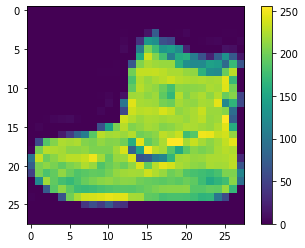

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

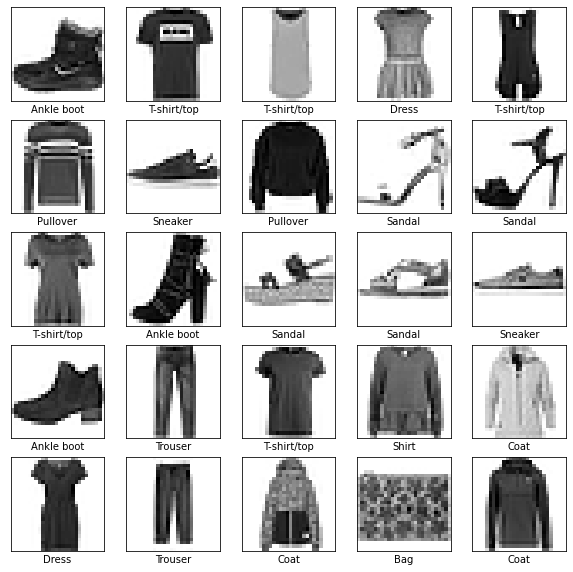

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6234 - accuracy: 0.7843
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3899 - accuracy: 0.8592
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3407 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3186 - accuracy: 0.8826
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2921 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2773 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2652 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2616 - accuracy: 0.9020
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.242

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3294 - accuracy: 0.8859

Test accuracy: 0.8859000205993652


Ref - https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

In [ ]:
first_image = test_images[0]
label=class_names[test_labels[0]]
predictions= model.predict(test_images)
image_probs = np.argmax(predictions[0])

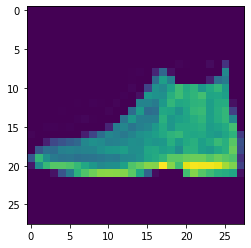

In [ ]:
plt.figure()
plt.imshow(first_image) # To change [-1, 1] to [0,1]
plt.show()

In [ ]:
label

'Ankle boot'

In [ ]:
image_probs

9

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    print("prediction is", prediction)
    class_idxs_sorted = np.argsort(prediction.numpy().flatten())[::-1]
    #loss = loss_object(input_label, prediction)
    loss = prediction[0][class_idxs_sorted[0]]

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad =  tf.math.abs(gradient)
  return signed_grad

In [ ]:
in_image = tf.Variable(first_image.reshape((1, 28, 28)).astype(np.float32) /255.0)

In [ ]:
print(test_labels[0])

9


prediction is tf.Tensor(
[[-2.5393448  -7.3090425  -4.7785487  -4.4681697  -5.465815    0.18131188
  -2.8639972  -4.3856993  -4.9231796  -7.6851325 ]], shape=(1, 10), dtype=float32)
perturbations is tf.Tensor(
[[[0.94682693 0.56426525 0.20003623 0.45897204 2.6327767  1.5085846
   0.02095771 1.0167662  0.27356538 0.35994348 0.7034846  2.0433636
   1.113524   0.7798246  0.15060112 1.5443388  1.9825101  0.5552208
   0.5075758  0.6198208  1.1755757  0.86239374 1.2392547  1.252461
   1.3509481  0.24967617 0.32273686 0.21961659]
  [2.1050076  0.02460837 0.30739036 1.005953   0.9104726  0.17594957
   1.1682949  0.06747925 1.047599   0.7525628  0.9034553  1.3831627
   1.4406832  1.8972902  1.8349594  2.0444157  1.3702898  1.4598528
   0.90342164 0.33073735 1.1250436  0.00679684 0.09843916 0.38834786
   0.36570698 1.1749597  0.9931203  0.8572476 ]
  [1.0814689  0.6561873  0.3889898  0.27367637 0.82886386 0.773746
   0.37310505 0.91257775 0.89667505 0.89362663 0.5820134  0.2746499
   0.42912108 

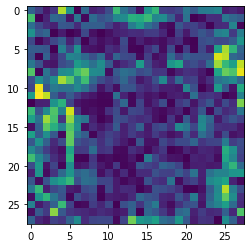

In [ ]:
perturbations = create_adversarial_pattern(in_image, test_labels[0])
print("perturbations is",perturbations)
plt.imshow(perturbations[0]*0.5+0.5) # To change [-1, 1] to [0,1]

In [ ]:
dgrad_max_ = np.max(perturbations,axis=1)[0]

In [ ]:
## normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

In [ ]:
def display_images(i):
  predictions= model.predict(i)
  label = np.argmax(predictions[0])
  plt.figure()
  plt.imshow(i[0]*0.5+0.5)
  plt.title('{}'.format(label))
  plt.show()

TypeError: ignored

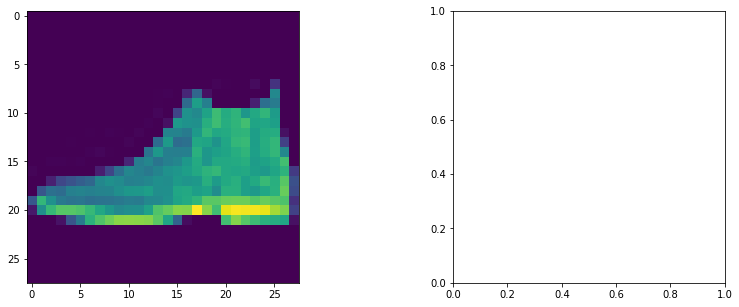

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(first_image)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

In [ ]:
adv_x = first_image + 0.1*perturbations
adv_x = tf.clip_by_value(adv_x, -1, 1)

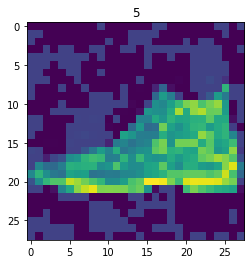

In [ ]:
display_images(adv_x)

Its difficult to tell if its show or a sandle

ToDO-- Do it for the entire batch

Targated Atatck

In [ ]:
#every image prediction is same

In [ ]:
p = model(adv_x, training=False)

In [ ]:
originalLoss = -loss_object(tf.convert_to_tensor([9]),p)

In [ ]:
targetLoss = loss_object(tf.convert_to_tensor([2]),p)

In [ ]:
totalLoss = originalLoss + targetLoss

In [ ]:
#instead of maximizing the loss of the true label, we maximize the loss of the loss of the true label and also minimize the loss for the alternative label.

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def create_adversarial_pattern_targated(input_image, input_label,my_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)
    alt_loss = -loss_object(my_label,prediction)
    total_los = loss+alt_loss

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(total_los, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [ ]:
test_labels[1]

2

In [ ]:
perturbations_targated = create_adversarial_pattern_targated(in_image, test_labels[0],test_labels[1])


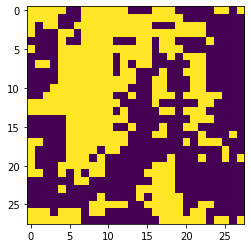

In [ ]:
plt.imshow(perturbations_targated[0]*0.5+0.5) # To change [-1, 1] to [0,1]

In [ ]:
def display_images(i):
  predictions= model.predict(i)
  label = np.argmax(predictions[0])
  plt.figure()
  plt.imshow(i[0]*0.5+0.5)
  plt.title('{}'.format(class_names[label]))
  plt.show()

In [ ]:
adv_x_targated = first_image + 0.15*perturbations_targated
adv_x_targated = tf.clip_by_value(adv_x_targated, -1, 1)

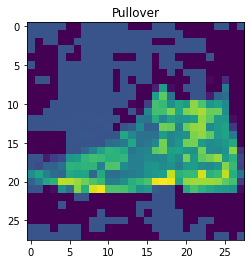

In [ ]:
display_images(adv_x_targated)

It is predicting 2. But will it predict anoter image also 2?

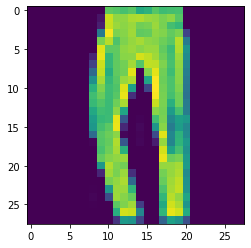

In [ ]:
plt.imshow(test_images[5])

In [ ]:
adv_x_targated = test_images[5] + 0.15*perturbations_targated #but it wroked for .12 and above value
adv_x_targated = tf.clip_by_value(adv_x_targated, -1, 1)

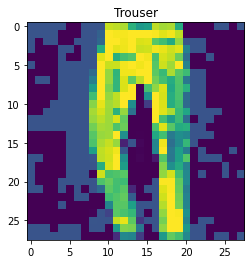

In [ ]:
display_images(adv_x_targated)

Adversarial Training

In [ ]:
adverserial_training_images = tf.add(train_images, 0.5*perturbations_targated)
adverserial_training_images = tf.clip_by_value(adverserial_training_images, -1, 1)

In [ ]:
adverserial_training_images=adverserial_training_images.numpy()

In [ ]:
adverserial_training_images.shape

(60000, 28, 28)

In [ ]:
adverserial_test_images = tf.add(test_images, 0.5*perturbations_targated)
adverserial_test_images = tf.clip_by_value(adverserial_test_images, -1, 1)

In [ ]:
adverserial_test_images=adverserial_test_images.numpy()

In [ ]:
adverserial_test_images.shape

(10000, 28, 28)

In [ ]:
#now try to predict

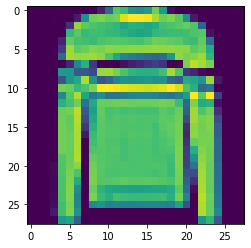

In [ ]:
plt.imshow(train_images[5])

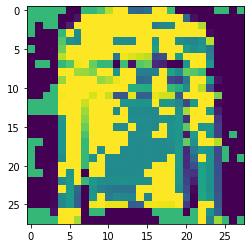

In [ ]:
plt.imshow(adverserial_training_images[5])
i = adverserial_training_images[5]

In [ ]:
class_names[train_labels[5]]

'Pullover'

In [ ]:
in_image = tf.Variable(adverserial_training_images[5].reshape((1, 28, 28)).astype(np.float32))

In [ ]:
predictions= model.predict(np.expand_dims(adverserial_training_images[5],0)) #np.expand_dims(test_images[0],0)

In [ ]:
label = np.argmax(predictions[0])
class_names[label]

'Pullover'

In [ ]:
#training on adversial images

In [ ]:
model.fit(adverserial_training_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6107 - accuracy: 0.8703
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2798 - accuracy: 0.8944
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2628 - accuracy: 0.9013
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2534 - accuracy: 0.9021
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2502 - accuracy: 0.9039
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2408 - accuracy: 0.9079
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2387 - accuracy: 0.9085
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2363 - accuracy: 0.9092
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2298 - accuracy: 0.9125
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.228

In [ ]:
test_loss, test_acc = model.evaluate(adverserial_test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3898 - accuracy: 0.8740

Test accuracy: 0.8740000128746033


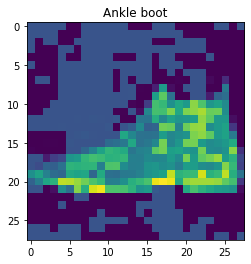

In [ ]:
display_images(adv_x_targated)